IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

MEMBUAT DATA MENGGUNAKAN TABEL

In [2]:
data = {
    "TEMPERATUR": [10, 25, 15, 20, 18, 20, 22, 24],
    "KECEPATAN_ANGIN": [0, 0, 5, 3, 7, 10, 5, 6],
    "PERSEPSI_MARRY": ["Dingin", "Panas", "Dingin", "Panas",
                       "Dingin", "Dingin", "Panas", "Panas"]
}

df = pd.DataFrame(data)
print("Data lengkap:")
print(df)

Data lengkap:
   TEMPERATUR  KECEPATAN_ANGIN PERSEPSI_MARRY
0          10                0         Dingin
1          25                0          Panas
2          15                5         Dingin
3          20                3          Panas
4          18                7         Dingin
5          20               10         Dingin
6          22                5          Panas
7          24                6          Panas


MEMISAHKAN DATA TRAINING DAN TESTING

In [3]:
df_train, df_test = train_test_split(
    df,
    test_size=0.25,      # 25% data untuk uji
    random_state=42,
    stratify=df["PERSEPSI_MARRY"]
)

print("\nData train:")
print(df_train)
print("\nData test:")
print(df_test)


Data train:
   TEMPERATUR  KECEPATAN_ANGIN PERSEPSI_MARRY
1          25                0          Panas
2          15                5         Dingin
3          20                3          Panas
7          24                6          Panas
0          10                0         Dingin
5          20               10         Dingin

Data test:
   TEMPERATUR  KECEPATAN_ANGIN PERSEPSI_MARRY
4          18                7         Dingin
6          22                5          Panas


DATA CLEANING

In [4]:
print("\nNilai unik PERSEPSI_MARRY (label):")
print(df_train['PERSEPSI_MARRY'].unique())


Nilai unik PERSEPSI_MARRY (label):
['Panas' 'Dingin']


MENGUBAH NILAI KATEGORIKAL MENJADI NUMERIK

In [5]:
# Dingin -> 0, Panas -> 1
replacements = {
    'PERSEPSI_MARRY': {'Dingin': 0, 'Panas': 1}
}

df_train = df_train.replace(replacements, inplace=False)
df_test  = df_test.replace(replacements, inplace=False)

print("\nData train setelah encoding:")
print(df_train.head())
print("\nData test setelah encoding:")
print(df_test.head())


Data train setelah encoding:
   TEMPERATUR  KECEPATAN_ANGIN  PERSEPSI_MARRY
1          25                0               1
2          15                5               0
3          20                3               1
7          24                6               1
0          10                0               0

Data test setelah encoding:
   TEMPERATUR  KECEPATAN_ANGIN  PERSEPSI_MARRY
4          18                7               0
6          22                5               1


/tmp/ipython-input-3565033592.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replacements, inplace=False)
/tmp/ipython-input-3565033592.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test  = df_test.replace(replacements, inplace=False)


MELIHAT MISSING VALUE

In [6]:
print("\nMissing value df_train:")
print(df_train.isna().sum())
print("\nMissing value df_test:")
print(df_test.isna().sum())


Missing value df_train:
TEMPERATUR         0
KECEPATAN_ANGIN    0
PERSEPSI_MARRY     0
dtype: int64

Missing value df_test:
TEMPERATUR         0
KECEPATAN_ANGIN    0
PERSEPSI_MARRY     0
dtype: int64


ANALISIS KORELASI FITUR

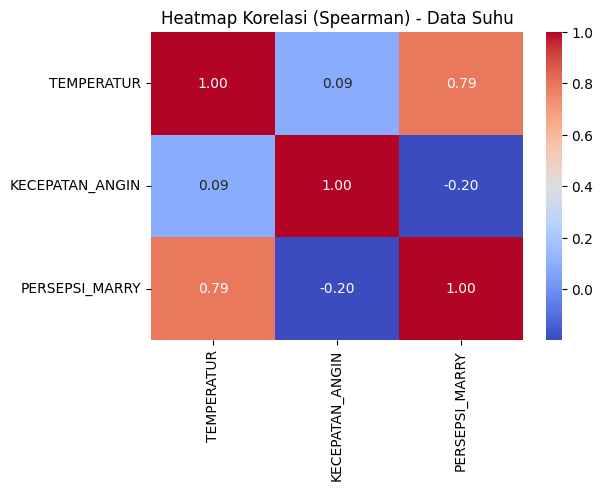

In [7]:
correlation_matrix = df_train.corr(method='spearman')

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            cmap='coolwarm', cbar=True)
plt.title("Heatmap Korelasi (Spearman) - Data Suhu")
plt.show()

VISUALISASI DISTRIBUSI LABEL

/tmp/ipython-input-3612901166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PERSEPSI_MARRY', data=df_train, palette='Set2')


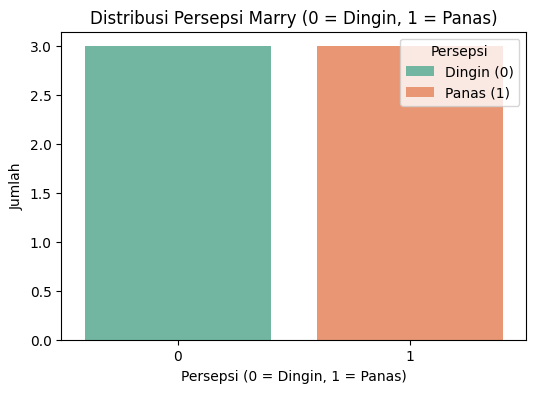

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='PERSEPSI_MARRY', data=df_train, palette='Set2')

plt.title('Distribusi Persepsi Marry (0 = Dingin, 1 = Panas)', fontsize=12)
plt.xlabel('Persepsi (0 = Dingin, 1 = Panas)', fontsize=10)
plt.ylabel('Jumlah', fontsize=10)

plt.legend(title='Persepsi', labels=['Dingin (0)', 'Panas (1)'], loc='upper right')
plt.show()

TAHAP MODELING

PEMISAHAN DATA DAN NORMALISASI

In [9]:
# data yang dilatih
x_train = df_train.drop(columns=['PERSEPSI_MARRY'])
y_train = df_train['PERSEPSI_MARRY']

# data validasinya
x_test = df_test.drop(columns=['PERSEPSI_MARRY'])
y_test = df_test['PERSEPSI_MARRY']

# normalisasi features after splitting
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

MENANGANI KETIDAKSEIMBANGAN KELAS DENGAN SMOTE

In [10]:
print("\nBefore SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1)  # sama seperti praktikum
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())


Before SMOTE:
PERSEPSI_MARRY
1    3
0    3
Name: count, dtype: int64

After SMOTE:
PERSEPSI_MARRY
1    3
0    3
Name: count, dtype: int64


MENENTUKAN PARAMETER TERBAIK MENGGUNAKAN HYPERPARAMETER TUNING

In [11]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("\nBest Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)


Best Params: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
Best Score (CV): 0.8333333333333334


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.66666667 0.66666667 0.83333333 0.66666667 0.66666667 0.66666667
 0.5        0.83333333        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.5        0.5        0.66666667 0.5        0.5        0.5
 0.5        0.66666667 0.5               nan 0.5               nan
 0.5               nan 0.5               nan 0.5              

MODEL KNN TERBAIK DAN MELAKUKAN PREDIKSI

In [23]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

# prediksi pada data test
y_pred = best_knn.predict(x_test_scaled)

EVALUASI MODEL DENGAN CLASSFICATION REPORT

In [13]:
print("\nClassification Report (Data Test):")
print(classification_report(y_test, y_pred))


Classification Report (Data Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



EVALUASI DENGAN CONFUSION MATRIX

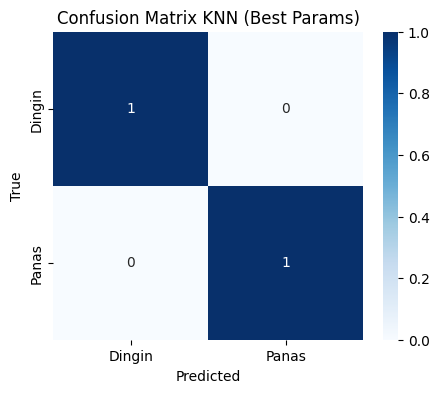

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Dingin', 'Panas'],
            yticklabels=['Dingin', 'Panas'])
plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

VALIDASI MODEL DENGAN CROSS VALIDATION

In [15]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=3)
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.8333333333333334
Std Dev: 0.23570226039551584


MENENTUKAN NILAI K OPTIMAL DENGAN ELBOW METHOD

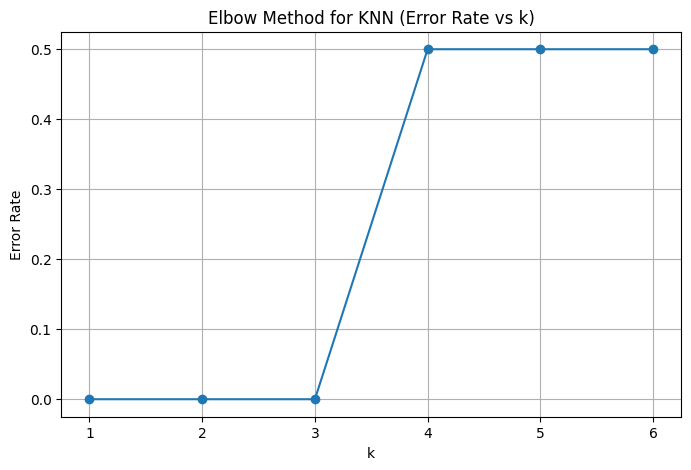

In [16]:
errors = []

# The maximum k should not exceed the number of samples in the training data
# len(x_train_smote) is 6, so k should go up to 6.
for k in range(1, len(x_train_smote) + 1):
    knn_temp = KNeighborsClassifier(
        n_neighbors=k,
        weights=grid.best_params_['weights'],
        metric=grid.best_params_['metric']
    )
    knn_temp.fit(x_train_smote, y_train_smote)
    pred = knn_temp.predict(x_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(x_train_smote) + 1), errors, marker='o')
plt.title("Elbow Method for KNN (Error Rate vs k)")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()

PREDIKSI PERSEPSI MARRY UNTUK DATA BARU

In [22]:
# temperatur = 16°C, angin = 3 km/jam

x_baru = [[16, 3]]  # temperatur, kecepatan angin
x_baru_scaled = scaler.transform(x_baru)
pred_baru = best_knn.predict(x_baru_scaled)[0]

label_mapping = {0: "Dingin", 1: "Panas"}
print(f"\nPersepsi Marry untuk (16°C, 3 km/jam): {label_mapping[pred_baru]}")


Persepsi Marry untuk (16°C, 3 km/jam): Dingin


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
